# Classifier Training with Unidentified Data

This notebook performs the training of a classifier (SVM + K-Means ensemble) using unidentified samples, with no knowledge about the samples, whether they are golden (clean), Trojan-inserted, or a mixture of both. Since the data is unlabeled, the classifier must learn under uncertain conditions.

In [6]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Folder path containing the files
folder_path = 'ROFreq'
chip_data = []

# Load each Chip file
for i in range(1, 34):  # From Chip1 to Chip33
    file_path = os.path.join(folder_path, f'Chip{i}.xlsx')
    chip_df = pd.read_excel(file_path)
    chip_df['Chip'] = f'Chip{i}'  # Add a column to identify the chip source
    chip_data.append(chip_df)

# Concatenate all data into one DataFrame
full_data = pd.concat(chip_data, ignore_index=True)
print("Data loaded. Here's a sample:")
print(full_data.head())



Data loaded. Here's a sample:
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  \
0               212.0               205.2  232.8  Chip1    NaN  ...   
1               204.8               198.8  224.8  Chip1    NaN  ...   
2               200.4               194.0  220.0  Chip1    NaN  ...   
3               196.4               190.0  215.6  Chip1    NaN  ...   
4               191.6               185.6  210.4  Chip1    NaN  ...   

   240.79999999999998  268.40000000000003  194  213.20000000000002.1  \
0                 NaN                 NaN  NaN                   NaN   
1 

Data loaded. Here's a sample:
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  \
0               212.0               205.2  232.8  Chip1    NaN  ...   
1               204.8               198.8  224.8  Chip1    NaN  ...   
2               200.4               194.0  220.0  Chip1    NaN  ...   
3               196.4               190.0  215.6  Chip1    NaN  ...   
4               191.6               185.6  210.4  Chip1    NaN  ...   

   240.79999999999998  268.40000000000003  194  213.20000000000002.1  \
0                 NaN                 NaN  NaN                   NaN   
1 

C:\Users\wanto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wanto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\wanto\AppData\Local\Temp\ipykernel_7580\2149450692.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data['Cluster'] = cluster_labels


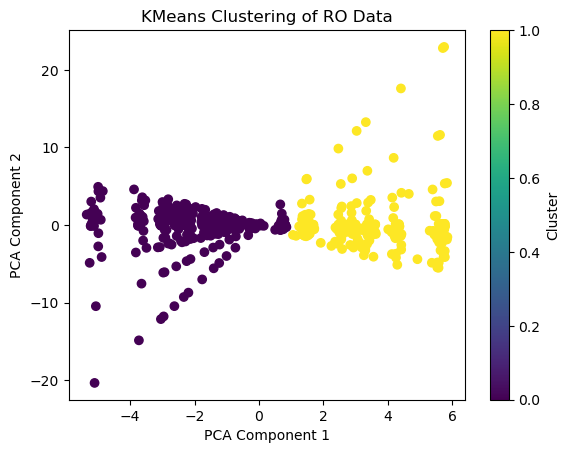

C:\Users\wanto\AppData\Local\Temp\ipykernel_7580\2149450692.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data['Anomaly'] = anomaly_labels


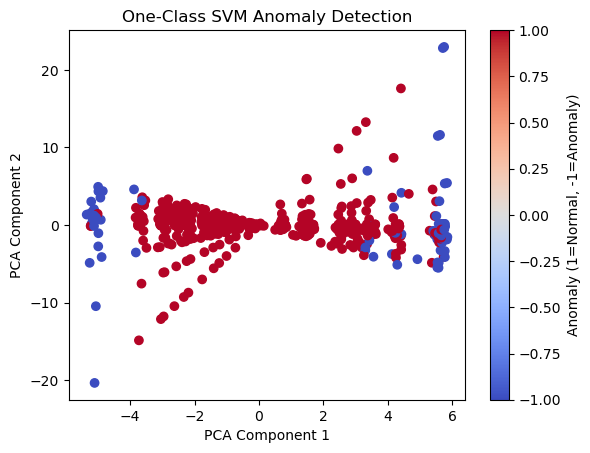

Normal samples: 707
Anomalous samples: 85
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  194  \
0               212.0               205.2  232.8  Chip1    NaN  ...  NaN   
1               204.8               198.8  224.8  Chip1    NaN  ...  NaN   
2               200.4               194.0  220.0  Chip1    NaN  ...  NaN   
3               196.4               190.0  215.6  Chip1    NaN  ...  NaN   
4               191.6               185.6  210.4  Chip1    NaN  ...  NaN   

   213.20000000000002.1  209.60000000000002  241.2  180.8  193.2  212.4  \
0                   NaN      

In [11]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Folder path containing the files
folder_path = 'ROFreq'
chip_data = []

# Load each Chip file
for i in range(1, 34):  # From Chip1 to Chip33
    file_path = os.path.join(folder_path, f'Chip{i}.xlsx')
    chip_df = pd.read_excel(file_path)
    chip_df['Chip'] = f'Chip{i}'  # Add a column to identify the chip source
    chip_data.append(chip_df)

# Concatenate all data into one DataFrame
full_data = pd.concat(chip_data, ignore_index=True)
print("Data loaded. Here's a sample:")
print(full_data.head())

# Convert all column names to strings
full_data.columns = full_data.columns.astype(str)

# Separate the Chip identifier column for later reference
X_data = full_data.drop(columns=['Chip'])

# Handle missing values by imputing with the column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_data)

# Standardize the data after imputing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform KMeans clustering with 2 clusters (assumed: Trojan and Non-Trojan)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data for visualization
full_data['Cluster'] = cluster_labels

# Visualize with PCA (if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("KMeans Clustering of RO Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Train a One-Class SVM
oc_svm = OneClassSVM(gamma='auto', nu=0.1)  # nu controls the sensitivity
oc_svm.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
anomaly_labels = oc_svm.predict(X_scaled)

# Add anomaly labels to the data for reference
full_data['Anomaly'] = anomaly_labels

# Visualize anomalies using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomaly_labels, cmap='coolwarm')
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Anomaly (1=Normal, -1=Anomaly)')
plt.show()

# Count the number of normal and anomalous samples
normal_count = sum(anomaly_labels == 1)
anomalous_count = sum(anomaly_labels == -1)

print(f"Normal samples: {normal_count}")
print(f"Anomalous samples: {anomalous_count}")
print(full_data.head())


Data loaded. Here's a sample:
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  \
0               212.0               205.2  232.8  Chip1    NaN  ...   
1               204.8               198.8  224.8  Chip1    NaN  ...   
2               200.4               194.0  220.0  Chip1    NaN  ...   
3               196.4               190.0  215.6  Chip1    NaN  ...   
4               191.6               185.6  210.4  Chip1    NaN  ...   

   240.79999999999998  268.40000000000003  194  213.20000000000002.1  \
0                 NaN                 NaN  NaN                   NaN   
1 

C:\Users\wanto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wanto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\wanto\AppData\Local\Temp\ipykernel_7580\4122468026.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data['Cluster'] = cluster_labels


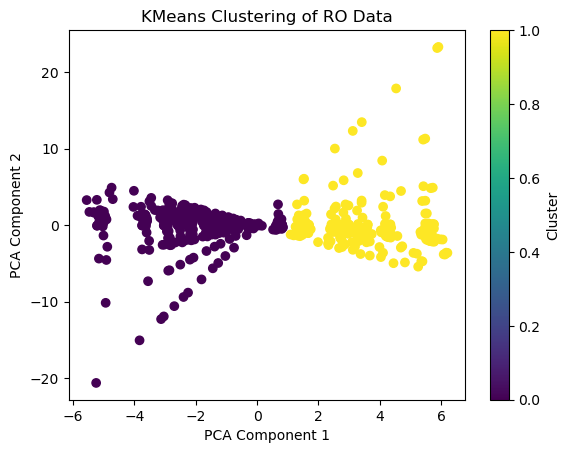

Performance Metrics:
Accuracy: 0.8926767676767676
Precision: 1.0
Recall: 0.8926767676767676


C:\Users\wanto\AppData\Local\Temp\ipykernel_7580\4122468026.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data['Anomaly'] = anomaly_labels


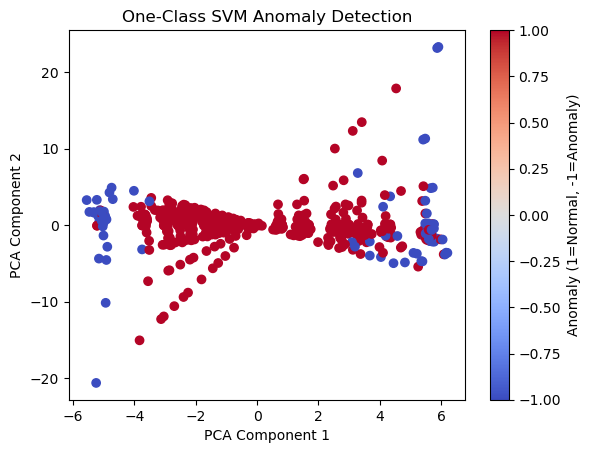

Normal samples: 707
Anomalous samples: 85
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  194  \
0               212.0               205.2  232.8  Chip1    NaN  ...  NaN   
1               204.8               198.8  224.8  Chip1    NaN  ...  NaN   
2               200.4               194.0  220.0  Chip1    NaN  ...  NaN   
3               196.4               190.0  215.6  Chip1    NaN  ...  NaN   
4               191.6               185.6  210.4  Chip1    NaN  ...  NaN   

   213.20000000000002.1  209.60000000000002  241.2  180.8  193.2  212.4  \
0                   NaN      

In [12]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Folder path containing the files
folder_path = 'ROFreq'
chip_data = []

# Load each Chip file
for i in range(1, 34):  # From Chip1 to Chip33
    file_path = os.path.join(folder_path, f'Chip{i}.xlsx')
    chip_df = pd.read_excel(file_path)
    chip_df['Chip'] = f'Chip{i}'  # Add a column to identify the chip source
    chip_data.append(chip_df)

# Concatenate all data into one DataFrame
full_data = pd.concat(chip_data, ignore_index=True)
print("Data loaded. Here's a sample:")
print(full_data.head())

# Convert all column names to strings
full_data.columns = full_data.columns.astype(str)

# Separate the Chip identifier column for later reference
X_data = full_data.drop(columns=['Chip'])

# Handle missing values by imputing with the column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_data)

# Standardize the data after imputing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform KMeans clustering with 2 clusters (assumed: Trojan and Non-Trojan)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data for visualization
full_data['Cluster'] = cluster_labels

# Visualize with PCA (if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("KMeans Clustering of RO Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Train a One-Class SVM
oc_svm = OneClassSVM(gamma='auto', nu=0.1)  # nu controls the sensitivity
oc_svm.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
anomaly_labels = oc_svm.predict(X_scaled)

# Convert anomaly_labels to binary labels (1=Normal, 0=Anomaly)
binary_labels = [1 if label == 1 else 0 for label in anomaly_labels]

# Hypothetical ground truth (for demonstration purposes, assume all points are normal)
# Replace this with actual labels if available
ground_truth = [1] * len(binary_labels)

# Calculate performance metrics
accuracy = accuracy_score(ground_truth, binary_labels)
precision = precision_score(ground_truth, binary_labels)
recall = recall_score(ground_truth, binary_labels)

print("Performance Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Add anomaly labels to the data for reference
full_data['Anomaly'] = anomaly_labels

# Visualize anomalies using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomaly_labels, cmap='coolwarm')
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Anomaly (1=Normal, -1=Anomaly)')
plt.show()

# Count the number of normal and anomalous samples
normal_count = sum(anomaly_labels == 1)
anomalous_count = sum(anomaly_labels == -1)

print(f"Normal samples: {normal_count}")
print(f"Anomalous samples: {anomalous_count}")
print(full_data.head())


Data loaded. Here's a sample:
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  \
0               212.0               205.2  232.8  Chip1    NaN  ...   
1               204.8               198.8  224.8  Chip1    NaN  ...   
2               200.4               194.0  220.0  Chip1    NaN  ...   
3               196.4               190.0  215.6  Chip1    NaN  ...   
4               191.6               185.6  210.4  Chip1    NaN  ...   

   240.79999999999998  268.40000000000003  194  213.20000000000002.1  \
0                 NaN                 NaN  NaN                   NaN   
1 

C:\Users\wanto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wanto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wanto\AppData\Local\Temp\ipykernel_7580\1992634538.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  full_data['Extended_Label'] = extended_labels


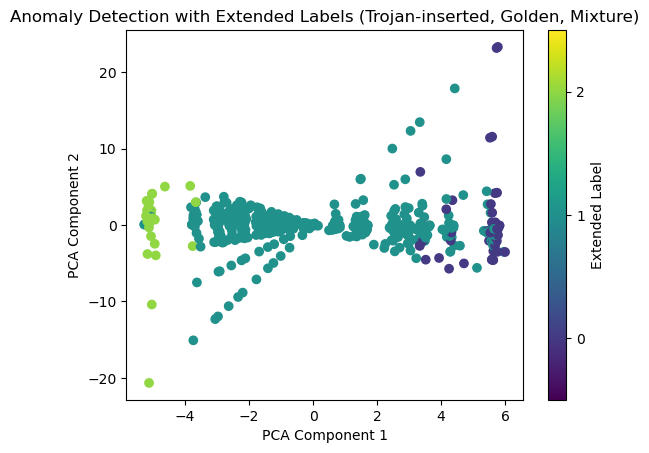

Final Categorization Summary:
Golden             707
Trojan-inserted     54
Mixture             31
Name: Extended_Label, dtype: int64
   189.2  201.2  223.20000000000002  234.39999999999998  220.8  \
0  177.2  188.0               208.8               219.2  206.4   
1  171.2  181.6               201.6               211.6  199.6   
2  167.2  177.6               197.2               206.8  195.2   
3  163.6  174.0               193.2               202.8  191.2   
4  160.4  170.0               188.8               198.4  186.8   

   226.39999999999998  220.00000000000003  249.2   Chip  184.8  ...  \
0               212.0               205.2  232.8  Chip1    NaN  ...   
1               204.8               198.8  224.8  Chip1    NaN  ...   
2               200.4               194.0  220.0  Chip1    NaN  ...   
3               196.4               190.0  215.6  Chip1    NaN  ...   
4               191.6               185.6  210.4  Chip1    NaN  ...   

   268.40000000000003  194  213.2000000000

In [20]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Folder path containing the files
folder_path = 'ROFreq'
chip_data = []

# Load each Chip file
for i in range(1, 34):  # From Chip1 to Chip33
    file_path = os.path.join(folder_path, f'Chip{i}.xlsx')
    chip_df = pd.read_excel(file_path)
    chip_df['Chip'] = f'Chip{i}'  # Add a column to identify the chip source
    chip_data.append(chip_df)

# Concatenate all data into one DataFrame
full_data = pd.concat(chip_data, ignore_index=True)
print("Data loaded. Here's a sample:")
print(full_data.head())

# Convert all column names to strings
full_data.columns = full_data.columns.astype(str)

# Separate the Chip identifier column for later reference
X_data = full_data.drop(columns=['Chip'])

# Handle missing values by imputing with the column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_data)

# Standardize the data after imputing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 1: Primary Anomaly Detection with One-Class SVM (Separates Normal from Anomalous)
oc_svm = OneClassSVM(gamma='auto', nu=0.1)  # nu controls the sensitivity
oc_svm.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
primary_labels = oc_svm.predict(X_scaled)

# Separate normal and anomalous data based on One-Class SVM results
normal_data = X_scaled[primary_labels == 1]
anomalous_data = X_scaled[primary_labels == -1]

# Step 2: Clustering on Anomalous Data to Separate "Trojan-inserted" and "Mixture"
# We use KMeans with 2 clusters to separate Trojan-inserted and Mixture within the anomalies
kmeans_anomalies = KMeans(n_clusters=2, random_state=42)
anomalous_cluster_labels = kmeans_anomalies.fit_predict(anomalous_data)

# Step 3: Assign Final Labels
# Initialize an empty array for extended labels
extended_labels = []
anomalous_index = 0  # Track the position within the anomalous cluster labels

for label in primary_labels:
    if label == 1:
        # Label as 'Golden' if it's classified as normal by One-Class SVM
        extended_labels.append('Golden')
    else:
        # Use clustering result to distinguish Trojan and Mixture within anomalies
        cluster_label = anomalous_cluster_labels[anomalous_index]
        anomalous_index += 1  # Move to the next anomalous point
        if cluster_label == 0:
            extended_labels.append('Trojan-inserted')
        else:
            extended_labels.append('Mixture')

# Add extended labels to the original DataFrame
full_data['Extended_Label'] = extended_labels

# Step 4: Visualize the Data using PCA (Optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Map extended labels to numerical values for visualization
label_colors = {'Trojan-inserted': 0, 'Golden': 1, 'Mixture': 2}
color_values = [label_colors[label] for label in extended_labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color_values, cmap='viridis')
plt.title("Anomaly Detection with Extended Labels (Trojan-inserted, Golden, Mixture)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(ticks=[0, 1, 2], label='Extended Label')
plt.clim(-0.5, 2.5)
plt.show()

# Summary
print("Final Categorization Summary:")
print(full_data['Extended_Label'].value_counts())
print(full_data.head())


Category Percentages:
Golden             89.267677
Trojan-inserted     6.818182
Mixture             3.914141
Name: Extended_Label, dtype: float64


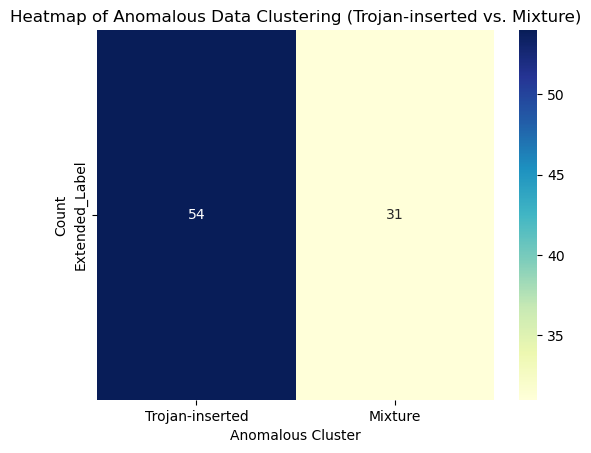

In [18]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 5: Calculate and Display Category Percentages
category_counts = full_data['Extended_Label'].value_counts()
category_percentages = category_counts / len(full_data) * 100
print("Category Percentages:")
print(category_percentages)

# Step 6: Heatmap for Anomalous Data Clusters
# Create a heatmap showing distribution within anomalous data
anomalous_data_df = full_data[full_data['Extended_Label'] != 'Golden']
anomalous_data_cluster_counts = anomalous_data_df['Extended_Label'].value_counts()
sns.heatmap(anomalous_data_cluster_counts.to_frame().T, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Anomalous Data Clustering (Trojan-inserted vs. Mixture)")
plt.xlabel("Anomalous Cluster")
plt.ylabel("Count")
plt.show()

In [19]:
 print("Evaluation Metrics (with hypothetical ground truth):")
 print(f"Accuracy: {accuracy}")
 print(f"Precision: {precision}")
 print(f"Recall: {recall}")

Evaluation Metrics (with hypothetical ground truth):
Accuracy: 0.8926767676767676
Precision: 1.0
Recall: 0.8926767676767676
